

# Hierarchical Clustering and Cluster Evaluation

This week, let us consider presidential elections of years past and do some exploratory grouping of states based on the 2008,2012, and 2016 presidential elections results.  The data we have is from the [The American Presidency Project](https://www.presidency.ucsb.edu/statistics/elections) and split into two files:

  - `votes_by_state.csv` => has the raw number of ballots cast for each of the top presidential candidates from 2008-2012 by US State (and the District of Columbia)
  - `republican_percentage_by_state.csv` => has the percentage of votes that were for the Republican candidate for 2008, 2012, and 2016 by US State (and the District of Columbia)
  
Our job is to group together states using different hierarchical agglomerative methodologies and compare the results.  You can imagine how finding states that tend to vote similarly to each other might be useful for election predictions, or for identifying swing states as part of a political campaign to invest in.

In [1]:
# Do not modify import block, all necessary imports are included

# Our regular libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

# This is for our hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

# For our k-means clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples

## Different Proximity Functions



Use these libraries to plot the hierarchical clusters formed from the raw vote count (`votes_by_state.csv`) using three different proximity measures:
  - Ward
  - Min
  - Max
  

In [2]:
# Load the data, save off the state names into another series and just leave the attributes.
df_X = pd.read_csv('votes_by_state.csv')
s_states = df_X['State']
df_X = df_X.drop(columns=['State'])

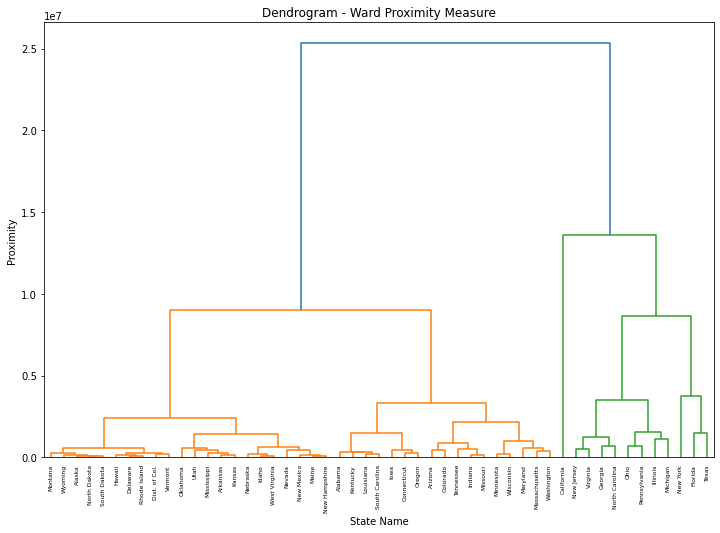

In [5]:
# Plot the dendrogram for the Ward proximity measure
l = linkage(df_X, 'ward')
fig = plt.figure(figsize = (12,8))
dd = dendrogram(l, labels = list(s_states))
plt.title("Dendrogram - Ward Proximity Measure")
plt.xlabel('State Name')
plt.ylabel('Proximity')
plt.show()

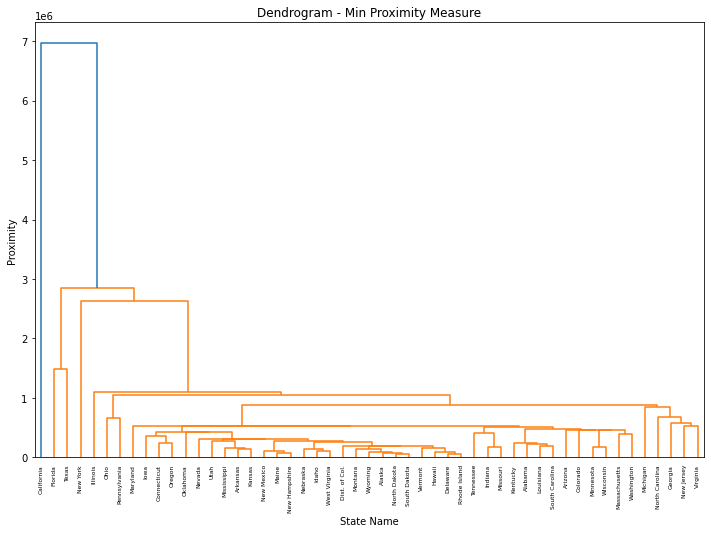

In [6]:
# Plot the dendrogram for the min proximity measure
l2 = linkage(df_X, method = "single")
fig = plt.figure(figsize = (12,8))
dd = dendrogram(l2, labels = list(s_states))
plt.title("Dendrogram - Min Proximity Measure")
plt.xlabel('State Name')
plt.ylabel('Proximity')
plt.show()

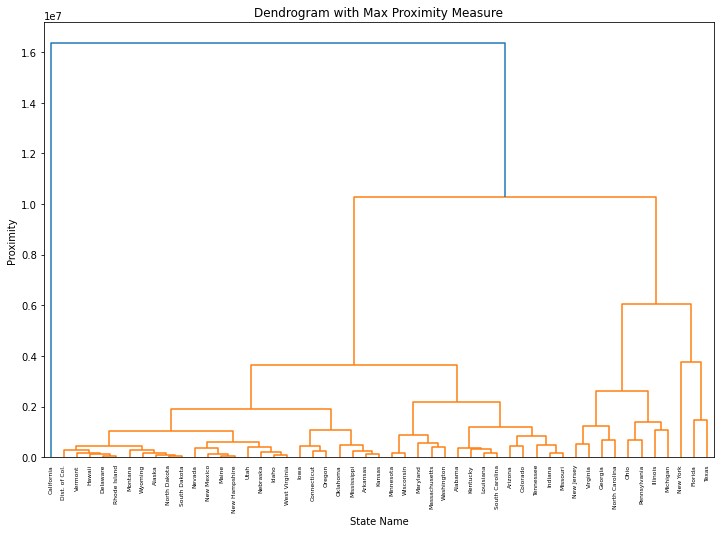

In [7]:
# Plot the dendrogram for the max proximity measure
l3 = linkage(df_X, method = "complete")
fig = plt.figure(figsize = (12,8))
dd = dendrogram(l3, labels = list(s_states))
plt.title("Dendrogram with Max Proximity Measure")
plt.xlabel('State Name')
plt.ylabel('Proximity')
plt.show()

In [34]:
# Load the data, save off the state names into another series and just leave the attributes.
df_X = pd.read_csv('republican_percentage_by_state.csv')
df = df_X.copy()
s_states = df_X['State']
df_X = df_X.drop(columns=['State'])

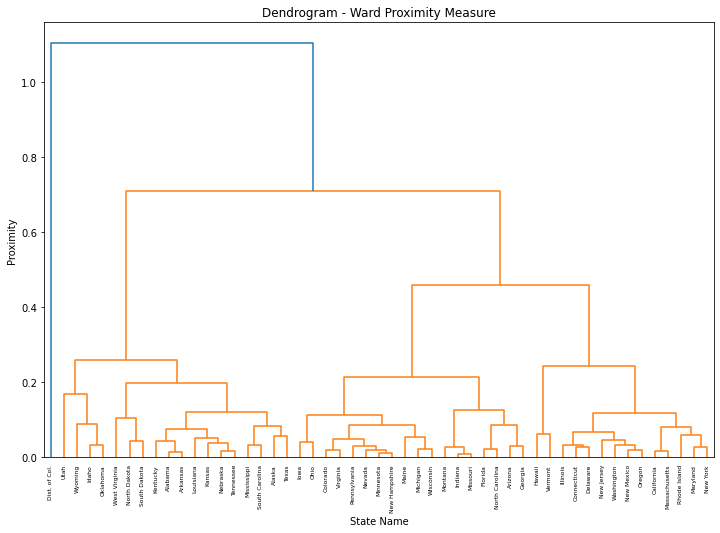

In [15]:
# Plot the dendrogram for the Ward proximity measure
lw = linkage(df_X, 'ward')
fig = plt.figure(figsize = (12,8))
dd = dendrogram(l, labels = list(s_states))
plt.title("Dendrogram - Ward Proximity Measure")
plt.xlabel('State Name')
plt.ylabel('Proximity')
plt.show()

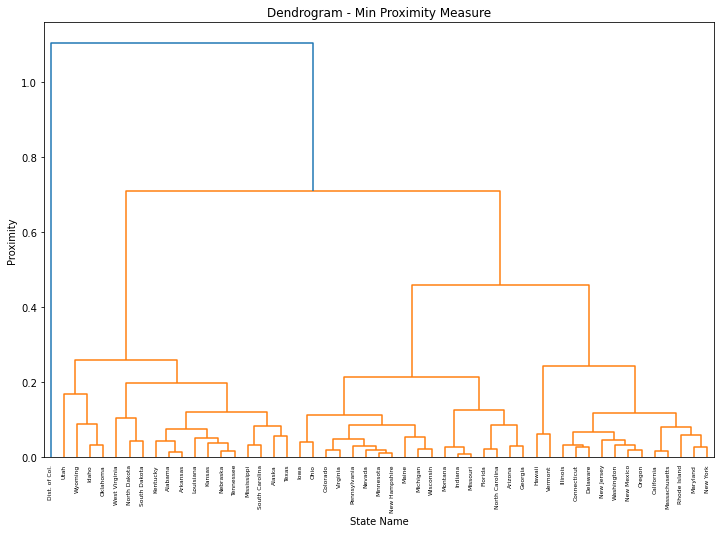

In [14]:
# Plot the dendrogram for the min proximity measure
lmin = linkage(df_X, 'single')
fig = plt.figure(figsize = (12,8))
dd = dendrogram(l, labels = list(s_states))
plt.title("Dendrogram - Min Proximity Measure")
plt.xlabel('State Name')
plt.ylabel('Proximity')
plt.show()

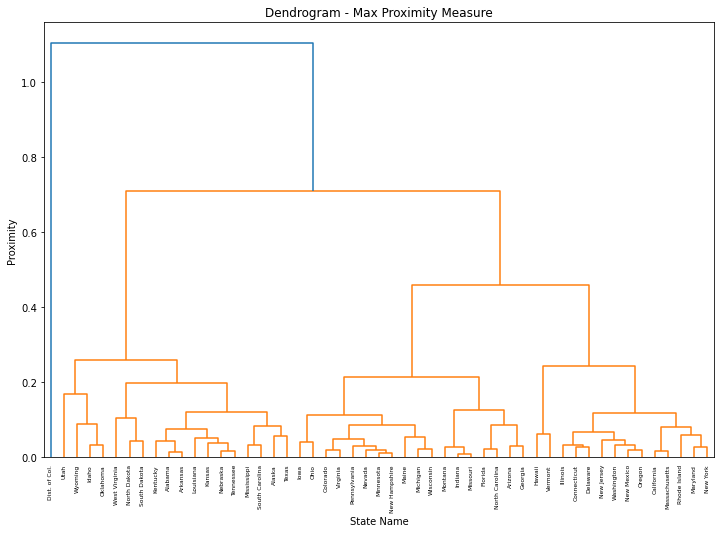

In [13]:
# Plot the dendrogram for the max proximity measure
lmax = linkage(df_X, 'complete')
fig = plt.figure(figsize = (12,8))
dd = dendrogram(l, labels = list(s_states))
plt.title("Dendrogram - Max Proximity Measure")
plt.xlabel('State Name')
plt.ylabel('Proximity')
plt.show()

## Cophenetic Correlation Coefficient (CPCC)


In [19]:
y = pdist(df_X)
cpcc_ward = cophenet(lw,y)[0]
cpcc_min = cophenet(lmin,y)[0]
cpcc_max = cophenet(lmax,y)[0]

In [20]:
# Show the results
(cpcc_ward,cpcc_min,cpcc_max)

(0.5883071696030503, 0.6954635857680919, 0.7406937703705782)

➡️ _your explanation here_ ⬅️

The CPCC correlation using ward is 58.83%. 
The CPCC correlation using min is 69.55%. 
The CPCC correlation using max is 74.07%. 
Therefore, max gives the best goodness of fit of out clustering.

## Find new Clusters Based on K-Means



In [39]:
# Find the centroids
centroids = df.set_index("State")
cen_index = ['Montana', 'Arkansas', 'Massachusetts','Minnesota']

centroids = centroids.loc[cen_index]
centroids = centroids.reset_index()

In [40]:
# Show the centroids
centroids

,State,2016,2012,2008,range
0,Montana,0.575769,0.570342,0.511694,0.064075
1,Arkansas,0.625343,0.621544,0.601717,0.023625
2,Massachusetts,0.338355,0.382143,0.368029,0.043788
3,Minnesota,0.471869,0.460588,0.447706,0.024163


In [44]:
# Compute the k-means clusters and show the listing of the States in each cluster
KMeans(random_state=23).fit(df_X)
#print State

KMeans(random_state=23)